<a href="https://colab.research.google.com/github/NMiguelLeon/mio-/blob/main/PBI_percapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicción de PIB: paises del mundo**
Nelson Miguel León García 
_____________________________________________________________________________
#Introduccion
*_____________________________________________________________________________*

> Bloc con sangría


El producto interno bruto (PIB) es un indicador económico que refleja el valor monetario de todos los bienes y servicios finales producidos por un territorio en un determinado periodo de tiempo.
El producto interno bruto es usado para comparar economias nacionales en el mercado internacional o como una perspectiva general del progeso economico de un país. El  (PIB) per cápita es una métrica financiera que desglosa la producción económica de un país por persona y se calcula dividiendo el PIB de una nación por su población.
______________________________________________________________________________
#Objetivo
______________________________________________________________________________
A partir de los diferentes datos recopilados en 227 paises, nuestra finalidad será analizar el PIB y ver la relaciones con las multiples variables de cada region, para asi obtener informacion util y concluyente, ademas de generar una predicion de su comportamineto me4diante las herramientas disponibles. 
_____________________________________________________________________________
#variables
_____________________________________________________________________________
En el dataframe se consideran las siguientes variables que pueden tener alguna relacion con el PIB (GDP)
* Country: Nombre del país
* Region: Región del continene en la que esta ubicado él pais.
* Population: Cantidad de poblacion por milla cuadrada.
* Área: Area por milla cuadrada
* Population density: Densidad poblacional por milla cuadrada.
* Coastline: Línea costera (relacion costa/área)
* Net migration: Migracion neta.
* Infant mortality: Mortalidad infantil por 1000 nacimientos.
* GDP: Producto interno bruto per capita
* Literacy: Analfabetismo del país por porcentaje
* Phones: Número de celulares por 1000
* Arable: Capacidad cultivable de un país por porcentaje.
* Crops: Cultivos por porcentaje.
* Other: Otros (?)
* Climate: Clima
* Birthrate: Tasa de nacimientos.
* Deathrate: Tasa de fallecimientos.
* Agriculture: Agricultura.
* Industry: Industria.
* Service: Servicios.

_________________________________________________________________
#1 Instalación de paquetes
___________________________________________________
Para el correcto analisis de la anterior estructura de datos mostrada, se instalarón los siguientes paquetes:
* NumPy: Librería de Python especializada en el
cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos.
* Pandas: Librería de Python especializada en el manejo y análisis de estructuras de datos.
* Matplotlib.pyplot: Librería de Python especializada en la creación de gráficos en dos dimensiones.
* Seaborn: Librería de Python que permite generar fácilmente gráficos. Seaborn esta basada en matplotlib.
* Sklearn: Scikit-learn es una biblioteca de aprendizaje automático de software libre para el lenguaje de programación Python. Cuenta con varios algoritmos de clasificación, regresión y agrupamiento. Está diseñado para interactuar con las bibliotecas numéricas y científicas de Python NumPy y SciPy.


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

________________________________________________________________________________
#2 El conjunto de datos
________________________________________________________________________________
 **df** define el dataframe, es decir, el conjunto de datos dados a estudiar. \\
 Aplicamos " decimal=',' " para que se lea la coma como un separador decimal.





In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NMiguelLeon/mio-/main/countries%20of%20the%20world.csv', decimal=',')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


_____________________________________________________________________________
##2.1 Tipos de variables
__________________________________________________________________
La instrucción `dtypes` nos muestra que tipo de variables posee nuestra estructura de datos. <br>  Para este caso en particular contamos con:

*   Objeto: Texto (str) o valores mixtos numéricos y no numéricos
*   int64: Número entero de 64 bits
* float64: Número flotante (decimal) de 64 bits



In [ ]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Para conocer la dimensionalidad del arreglo, el comando `shape` muestra el siguiente resultado. 

In [ ]:
df.shape

(227, 20)

Se encuentra entonces que tenemos un arreglo de $227$ filas ×  $20$ columnas que corresponden a los $227$ paises y las $20$ variables del dataframe.




________________________________________________________________________________
##2.2 Valores nulos
___________________________________________________________________________
Para reconocer correctamente los valores no asignados o nulos en nuestra base de datos, el metodo `isnull()` es aplicado. `sum()` se encargará entonces de sumar los datos faltantes de la siguiente manera:



In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

________________________________________________________________________________
#3 Imputación de datos faltantes
________________________________________________________________________________
Nuestra base de datos consta de valor no nulos para algunas columnas que no podran ser simplemente igualados a $0$, entonces se imputaran valores que creamos convenientes; por ejemplo, la media. <br> Veamos entonces la aplicación de la media respecto a cada una de las columnas que componen el dataframe.

In [ ]:
df[['Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']].mean()

Net migration                            0.038125
Infant mortality (per 1000 births)      35.506964
GDP ($ per capita)                    9689.823009
Literacy (%)                            82.838278
Phones (per 1000)                      236.061435
Arable (%)                              13.797111
Crops (%)                                4.564222
Other (%)                               81.638311
Birthrate                               22.114732
Deathrate                                9.241345
Agriculture                              0.150844
Industry                                 0.282711
Service                                  0.565283
dtype: float64

No podemos asegurar que la media sea adecuada para paises; por ejemplo, un país de africa del este no tiene el mismo PIB que un país europeo. Por suerte, si aplicamos la mediana por regiones, la imputación de datos es más adecuada. 

In [ ]:
#ejemplo
media_GDP_global=print(df["GDP ($ per capita)"].mean())
GDP_zambia=print(df.loc[225, 'GDP ($ per capita)'])

9689.823008849558
800.0


Se agrupara entonces por regiones, y a partir de alli, se tomará la media.

In [ ]:
mediana_regiones = df.groupby('Region', as_index=False)[['Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']].median()
mediana_regiones


,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),26336502.5,208920.0,192.00,1.235,0.000,30.775,3450.0,90.60,61.50,13.595,1.005,81.160,19.565,6.960,0.1610,0.2815,0.4950
1,BALTICS,2274735.0,64589.0,35.20,0.820,-2.230,7.870,11400.0,99.80,321.40,29.670,0.470,69.860,9.240,13.250,0.0400,0.2940,0.6660
2,C.W. OF IND. STATES,7641217.0,203050.0,56.10,0.000,-2.085,32.425,3450.0,99.05,155.35,11.135,0.875,86.520,15.850,9.325,0.1980,0.3295,0.4595
3,EASTERN EUROPE,6412407.5,67704.0,102.75,0.065,0.085,9.330,9100.0,98.60,296.05,31.755,2.260,65.335,9.720,10.310,0.0815,0.3095,0.5910
4,LATIN AMER. & CARIB,1065842.0,22966.0,91.40,3.370,-1.220,18.050,6300.0,94.05,222.85,7.600,1.980,87.230,18.020,6.090,0.0700,0.2590,0.6180
5,NEAR EAST,3488139.5,51825.0,87.50,1.145,0.555,19.060,9250.0,83.00,211.00,5.305,2.780,89.660,21.595,4.560,0.0350,0.3520,0.5840
6,NORTHERN AFRICA,21552552.5,724000.0,38.00,0.325,-0.390,31.000,6000.0,70.00,123.60,3.045,0.365,96.590,21.980,5.130,0.1320,0.3570,0.4255
7,NORTHERN AMERICA,65773.0,2166086.0,29.00,2.040,2.490,7.540,29800.0,97.50,683.20,13.040,0.000,86.960,13.520,7.800,0.0100,0.2040,0.7870
8,OCEANIA,114689.0,811.0,60.10,47.080,0.000,12.620,5000.0,95.00,118.60,5.710,6.990,84.400,22.320,5.690,0.1505,0.1710,0.6440
9,SUB-SAHARAN AFRICA,8090068.0,245857.0,39.60,0.130,0.000,76.830,1300.0,62.95,9.70,7.580,0.725,90.380,37.980,14.860,0.2760,0.2190,0.4260


Lo que haremos es crear un codigo que toma mediante un codigo condicional `if\else\elif`, primero le pedimo que considere los valores del dataframe. Si es la columna variable Climate, entonces la deja igual. Si no es la columna climate, toma la mediana de cada variable respecto a su region y lo cambia.

In [ ]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    elif col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


La imputación de datos realizada muestra una base de datos limpia lista para ser analizada.

In [ ]:
df.isnull().sum()


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

aplicando otra vez el codigo `.isnull.sum()` obtenemos que con el algoritmo anterior los valores nulos han sido reemplazados, asi teniendo 0 valores nulos.

________________________________________________________________________________
# 4 Estadistica descriptiva

________________________________________________________________________________

`describe()` nos da los principales estadisticos descriptivos de nuestros datos.
* Count: Seria la suma de todos los valores
* Mean: la media es un promedio ponderado de los valores que asume la variable aleatoria cuando los pesos son las probabilidades. Es una medida de tendencia central. 
* Std: La desviación estándar es una medida que ofrece información sobre la dispersión media de una variable.
* Min: el valor minimo de todos los valores
* Cuantiles: Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. en este caso serian: el $25 \% $, $50 \%$ y $75 \%$ de los datos 
* Max: el valor maximo de todos los valores.

In [ ]:
df_st=df.describe()
df_st

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.035903,35.285463,9673.568282,83.588106,234.628414,13.783436,4.528040,81.679427,2.187225,22.060441,9.196652,0.148200,0.278449,0.570934
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856794,35.220671,10029.871625,19.315834,226.390263,12.990801,8.333309,16.079769,0.728050,11.132737,4.964786,0.143897,0.134792,0.163822
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,75.300000,38.500000,3.380000,0.190000,71.985000,2.000000,12.635000,5.795000,0.037000,0.190000,0.437500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,20.970000,5600.000000,92.600000,176.200000,10.420000,1.010000,85.700000,2.000000,18.790000,7.840000,0.099000,0.259000,0.580000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,98.000000,382.900000,20.000000,4.435000,95.230000,3.000000,29.770000,10.580000,0.216500,0.338000,0.682000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Un dato que podemos comparar la capacidad porcentual de cultivo con el porcentage de cultivos de los paises.

In [ ]:
print("el valor de la media porcentual global es", df_st.iloc[1,9], "%" , " , mientras que la media porcentual de el mundo es", df_st.iloc[1,10], "%" , "y", df_st.iloc[1,11] , "%", "serian los otros valores a considerar" )


el valor de la media porcentual global es 13.783436123348018 %  , mientras que la media porcentual de el mundo es 4.528039647577093 % y 81.67942731277533 % serian los otros valores a considerar


Por ejemplo, podemos interpretar es que la capacidad de la capacidad de cultivar de los paises es de $13.7$ % comparado con la de los cultivos, que es de $4.5$ % nos indica que sea cual sea la situacion de los paises, se esta deperdiciando la tierra productiva. el otro porcentage ($81,6$ %) nos indicaria el porcentage de tierra utlizada variadamente.

________________________________________________________________________________
#5 Analisis de graficas
________________________________________________________________________________

##5.1 Grafica regionales.
________________________________________________________________________________ 

Con lo anterior, ya es posible obtener ciertas descripciones graficas que dan una idea mas general de los datos con los que se trata:

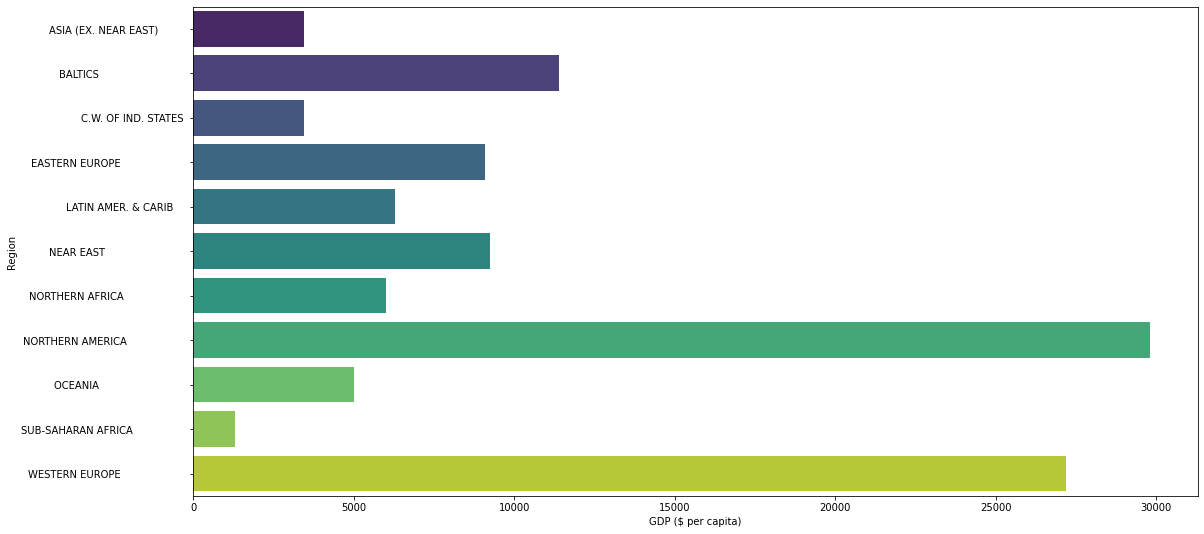

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.barplot(y='Region',x='GDP ($ per capita)' , data=mediana_regiones , palette= "viridis");

In [ ]:
print("podemos ver que los paises con PIB mediana mayor son norteamerica:", mediana_regiones.iloc[7,7], "y europa occidental:" , mediana_regiones.iloc[10,7], ", mientras que la mediana menor es africa sub-sahara:", mediana_regiones.iloc[9,7])

podemos ver que los paises con PIB mediana mayor son norteamerica: 29800.0 y europa occidental: 27200.0 , mientras que la mediana menor es africa sub-sahara: 1300.0


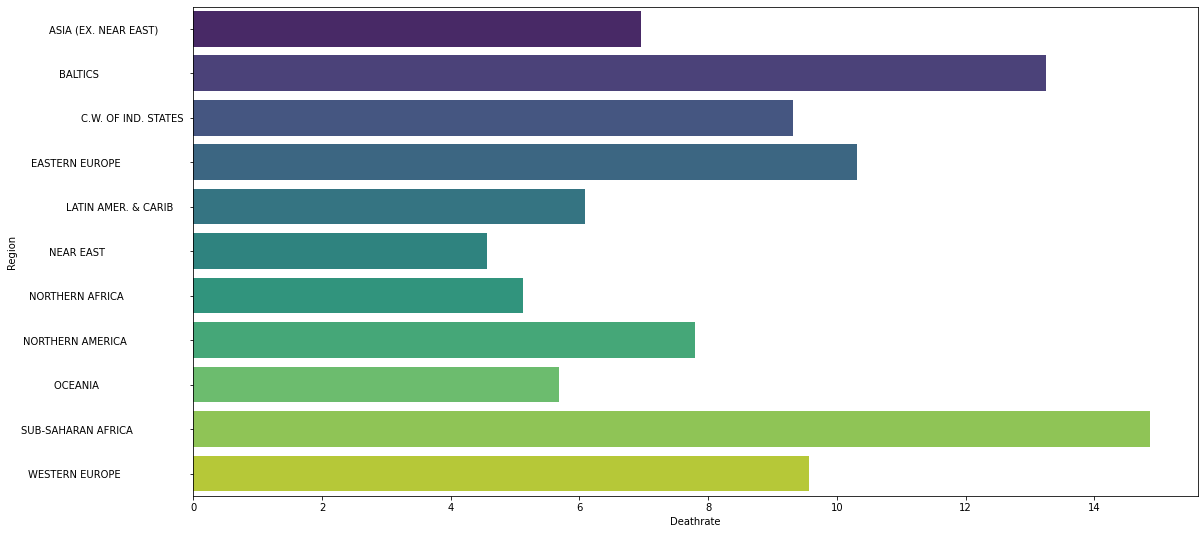

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.barplot(y='Region',x='Deathrate' , data=mediana_regiones, palette="viridis");

In [ ]:
print("podemos ver que las regiones con mayor mediana de tasa de muertes es africa sub-sahara:", mediana_regiones.iloc[9,14], ", mientras que la mediana menor es el cercano este:", mediana_regiones.iloc[5,14])

podemos ver que las regiones con mayor mediana de tasa de muertes es africa sub-sahara: 14.86 , mientras que la mediana menor es el cercano este: 4.5600000000000005


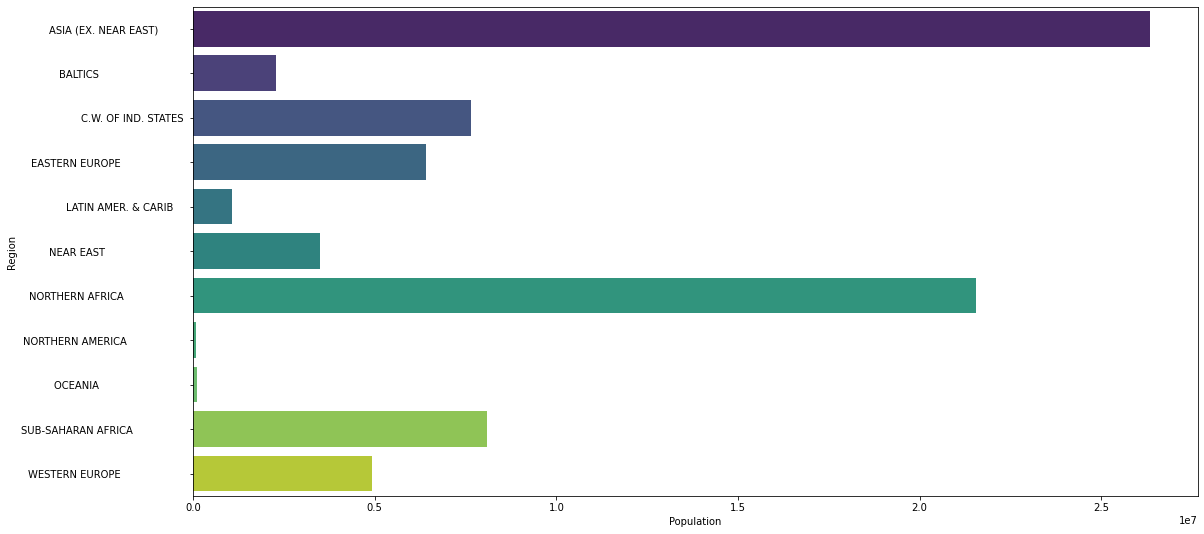

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.barplot(y='Region',x='Population' , data=mediana_regiones, palette="viridis");

In [ ]:
print("podemos ver que las regiones con mayor mediana de poblacion son asia:", mediana_regiones.iloc[0,1], "y el menor es norteamerica:", mediana_regiones.iloc[0,7])

podemos ver que las regiones con mayor mediana de poblacion son asia: 26336502.5 y el menor es norteamerica: 3450.0


entonces podemos concluir inicialmente, que no hay una relacion directa en el PIB y la poblacion, ya que tenemos por ejemplo a asia que seria la region mas poblada pero con una mediana de PIB menor. Caso contrario de norteamerica que posee el mayor PIB, pero la menor poblacion.

_______________________________________________________________________________
##5.2 Graficas de paises
_______________________________________________________________________________

Ahora que tenemos un espectro de cierta forma global, podemos mirar hacer un analisis por paises. entonces consideremos solo los 15 primeros piases en orden mayor. entonces los agrupamos por `groupy()` y con `max()` los ordenamos de mayor a menor y por ultimo `head()` para que solo grafique los 15 primeros paises.

utilizaremos `plot()` de tipos `kind="kde"` para obtener el digrama de barras.

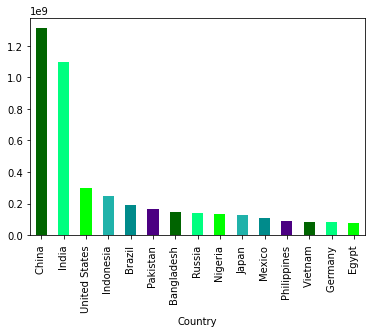

In [ ]:
df['Population'].groupby(df['Country']).max().sort_values(ascending=False).head(15).plot(kind='bar', color=['darkgreen','springgreen','lime', 'lightseagreen', 'darkcyan','indigo'])

podemos ver que el pais con mas poblacion es china e india con una poblacion casi del triple de los demas

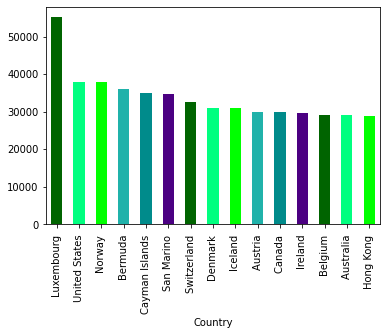

In [ ]:
df['GDP ($ per capita)'].groupby(df['Country']).max().sort_values(ascending=False).head(15).plot(kind='bar', color=['darkgreen','springgreen','lime', 'lightseagreen', 'darkcyan','indigo'])

Ahora usando `boxplot()` otenemos un diagrama de caja en donde podemos interpretar:
* las lineas del centro el borde superior y el inferior son considerados los cuantiles segun el orden ( de izquierda a derecha, el primer cuantil, el segundo cuantil y el tercer cuantil. )
* Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza esperada de los datos. Estos bigotes se extienden 1,5 veces el IQR desde los extremos superior e inferior de la caja.
* los puntos afuera del todo se llaman *outliers* y son los valores que sobrepasan los valores maximos y minimos

en este caso podemos ver que como vimos anteriormente eso valores estan dados por estdos unidos y luxemburgo. mas claramente en el diagrama de barras.



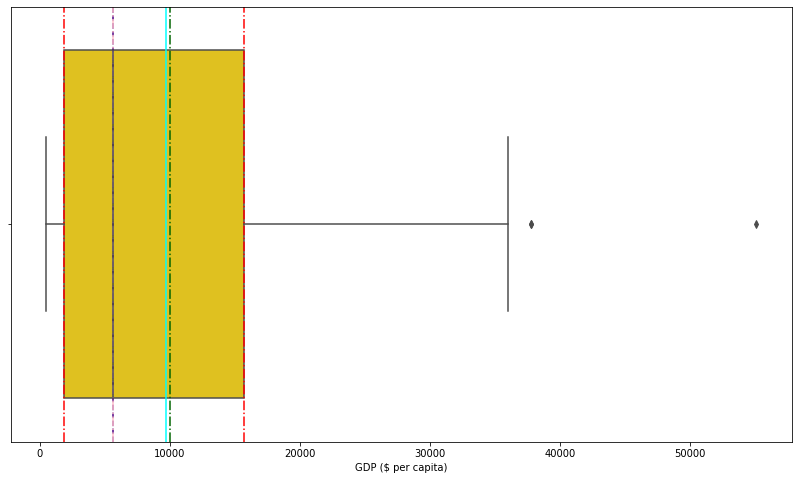

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df["GDP ($ per capita)"], color="Gold")
plt.axvline(np.median(df['GDP ($ per capita)']),color='indigo', linestyle='--')
plt.axvline(np.mean(df['GDP ($ per capita)']),color='cyan', linestyle='-')
plt.axvline(np.std(df['GDP ($ per capita)']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.75),color='red', linestyle='-.')

Podemos ver que la mayoria de los paises son europeos a exepcion de estados unidos que es mucho mayor.

____________________________________________________________________________________________________
##**5.3 tabla de didtribusiones**
_________________________________________________________________________________
La distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable, la probabilidad de que dicho suceso ocurra. La distribución de probabilidad está definida sobre el conjunto de todos los sucesos y cada uno de los sucesos es el rango de valores de la variable aleatoria.

Hay un muchos tipos de distribusiones, pero para simplificar el trabajo vamos a suponer que los diagramas generador abajo son distribuciones normales. Mediante el codigo `.displot` generaremos la graficas.

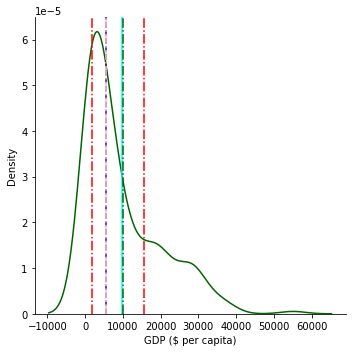

In [ ]:
sns.displot(df['GDP ($ per capita)'], kind='kde', color="darkgreen");
plt.axvline(np.median(df['GDP ($ per capita)']),color='indigo', linestyle='--')
plt.axvline(np.mean(df['GDP ($ per capita)']),color='cyan', linestyle='-')
plt.axvline(np.std(df['GDP ($ per capita)']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(df['GDP ($ per capita)'], 0.75),color='red', linestyle='-.')
plt.show()

De izquierda a derecha:
* La linea roja es el primer cuantil, representa el $25$ % de los datos.
* La linea rosa es el segundo cuantil, representa el $50$ % de los datos y como podemos ver coindice con la linea de color indigo, que es la mediana de los valores.
* La linea de color cian la media y coincide con la linea de color verde oscura, que representa la variacion estandar.
*La linea mde color rojo es el tercer cuantil y representa el $75$ % de los datos.

Podemos irterpretar muchas cosas. 

* la media se representa $σ$ y en la teroria de la distribucion normal. La mediana y la media son iguales, pero como podemos ver la esta lineas mno coinciden.
* La varianza se representa $𝜇^2$ y que nos dice que tan dispersos estan los valores y como podemos ver esta por encima del tercer cuantil por lo tanto, el parametro es muy grande, lo que quiere decir que los valores se estan acumulando.
* La distribucion normal, tiende a ser mucho mas simetrica que las demas distribuciones. Como podemos la distribucion del PIB es asimetrica por la carga de valores mayores a $2000$.   

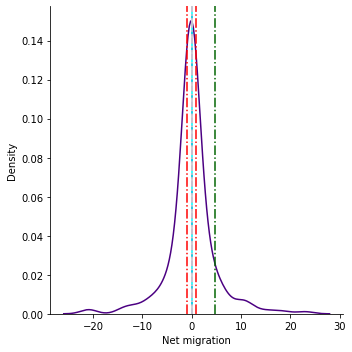

In [ ]:
sns.displot(df['Net migration'], kind='kde', color="indigo")
plt.axvline(np.median(df['Net migration']),color='indigo', linestyle='--')
plt.axvline(np.mean(df['Net migration']),color='cyan', linestyle='-')
plt.axvline(np.std(df['Net migration']),color='darkgreen', linestyle='-.')
plt.axvline(np.quantile(df['Net migration'], 0.25),color='red', linestyle='-.')
plt.axvline(np.quantile(df['Net migration'], 0.50),color='pink', linestyle='-.')
plt.axvline(np.quantile(df['Net migration'], 0.75),color='red', linestyle='-.')
plt.show()

Un ejemplo de como verse la distribusion normal es la distribucion de el valor neto de la migracion. como podemos ver la grafica es simetrica por los tanto sus cuantiles lo son, ademas de que la mediana y la media coinciden el el centro de la grafica, con el segundo cuantil.

________________________________________________________________________________
#6 Tabla de correlaciones
________________________________________________________________________________
La correlación es un tipo de asociación entre dos variables numéricas, específicamente evalúa la tendencia (creciente o decreciente) en los datos. A continuacion presentamos la tabla de correlaciones la obtenemos por `corr()` 
Y podemos utilizar `pairplot()` para conseguir todos los graficos de correlacion donde podemos interpretar de la siguiente manera:
* El signo nos indica la dirección de la relación, como hemos visto en el diagrama de dispersión:
 *  un valor positivo indica una relación directa o positiva
 *un valor negativo indica relación indirecta, inversa o negativa
 * un valor nulo indica que no existe una tendencia entre ambas variables (puede ocurrir que no exista relación o que la relación sea más compleja que una tendencia, por ejemplo, una relación en forma de U)

* La magnitud nos indica la fuerza de la relación, y toma valores entre -1 a 1. Cuanto más cercano sea el valor a los extremos del intervalo (1 o -1) más fuerte será la tendencia de las variables, o será menor la dispersión que existe en los puntos alrededor de dicha tendencia.
 * si es de $±$ 0.96 a $±$ 1, se considera perfecta.
 * si es de $±$ 0.85 a $±$ 0.95, se considera fuerte. 
 * si es de $±$ 0.7 a $±$ 0.84, se considera significativa.
 * si es de $±$ 0.0.5 a $±$ 0.69, se considera moderada
 * si es de $±$ 0.2 a $±$ 0.49, se considera debil
 * si es de $±$ 0.1 a $±$ 0.19, se considera muy debil.
 * si es de $±$ 0.09 a 0, se considera nula.

como la correlación es una relacion binaria, entonces generaria una tabla de $20 × 20$ lo cual seria poco practico. Tomaremos unos ejemplos para anlizarlos segun el criterio anterior.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


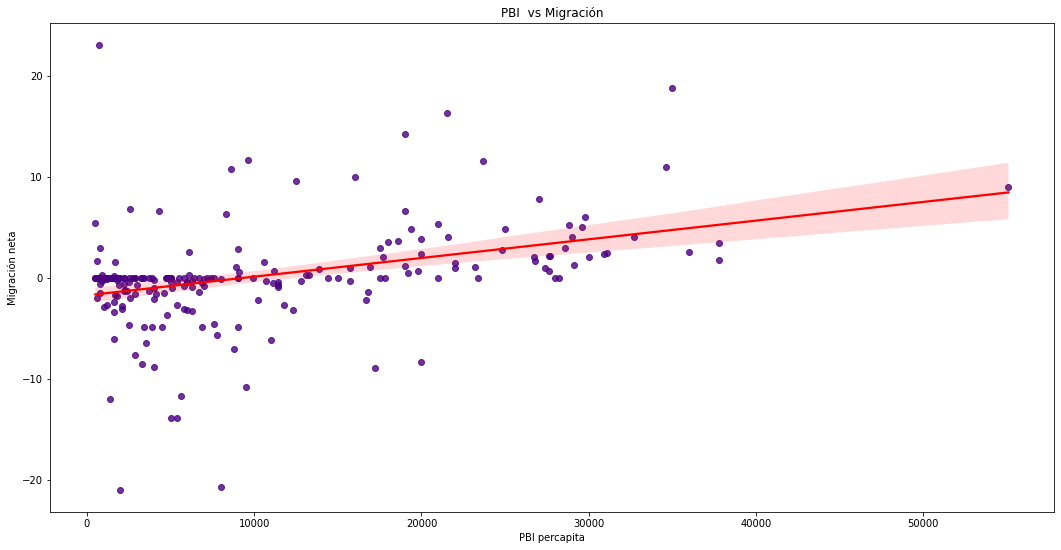

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.regplot(df["GDP ($ per capita)"], df["Net migration"], scatter_kws={"color": "indigo"}, line_kws={"color": "red"})
plt.title("PBI  vs Migración")
plt.xlabel("PBI percapita")
plt.ylabel("Migración neta")
plt.show()

In [ ]:
print('Correlación Pearson: ', df['GDP ($ per capita)'].corr(df["Net migration"], method='pearson'))

Correlación Pearson:  0.3820285916257282


Como podemos ver es una correlacion que se aproxima a una lineal. aunque podemos ver que los valores tiende a estar un poco dispersos, por lo tanto podemos verlo como una correlacion positiva y debil.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

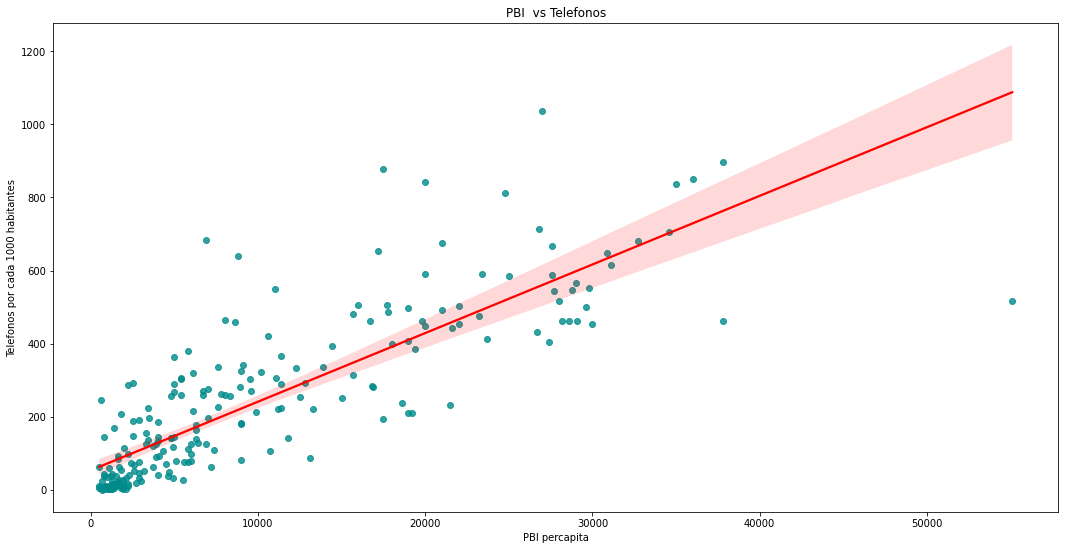

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.regplot(df["GDP ($ per capita)"], df["Phones (per 1000)"], scatter_kws={"color": "darkcyan"}, line_kws={"color": "red"})
plt.title("PBI  vs Telefonos")
plt.xlabel("PBI percapita")
plt.ylabel("Telefonos por cada 1000 habitantes")
plt.show

In [ ]:
print('Correlación Pearson: ', df['GDP ($ per capita)'].corr(df["Phones (per 1000)"], method='pearson'))

Correlación Pearson:  0.8323640369760107


la correlacion entre el PIB Y el numero de telefonos de los paises es lineal; positiva y como los punto estan mucho mas conglomerados entonces es significativa:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

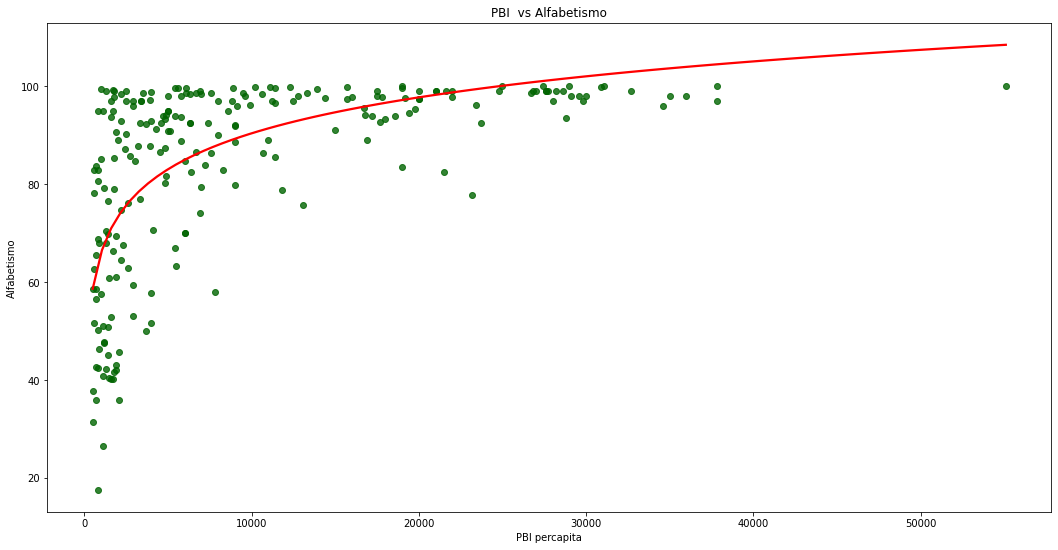

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.regplot(df["GDP ($ per capita)"], df["Literacy (%)"], scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"}, logx = True,  ci=None)
plt.title("PBI  vs Alfabetismo")
plt.xlabel("PBI percapita")
plt.ylabel("Alfabetismo")
plt.show

In [ ]:
print('Correlación Pearson: ', df['GDP ($ per capita)'].corr(df["Literacy (%)"], method='pearson'))

Correlación Pearson:  0.5088387202481173


En la correlacion entre el PIB y el alfabestismo podemos ver que no es lineal pero el criterio se mantiene, es fuerte.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

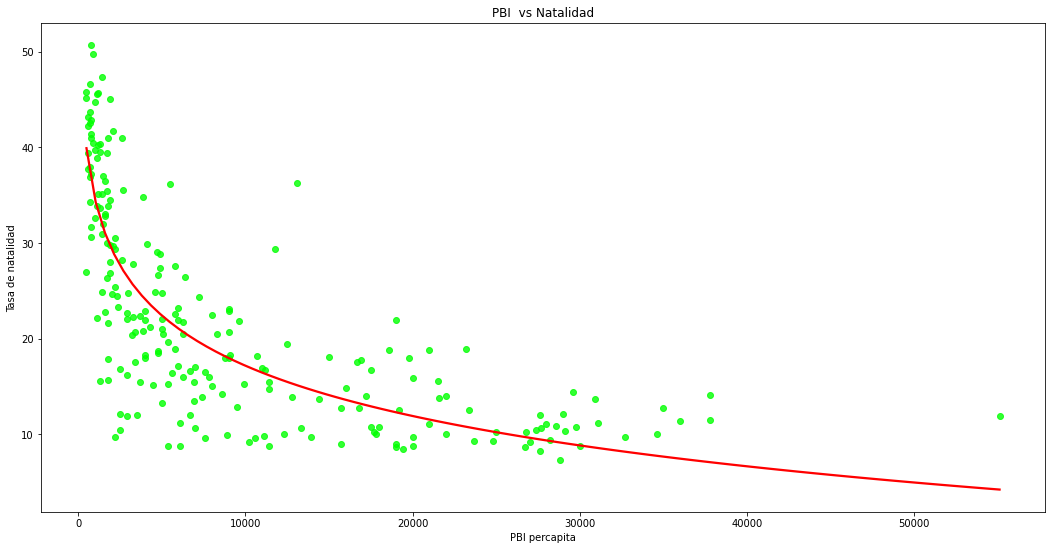

In [ ]:
plt.figure
plt.figure(figsize=(18,9))
sns.regplot(df["GDP ($ per capita)"], df["Birthrate"], scatter_kws={"color": "lime"}, line_kws={"color": "red"},  logx= True, ci=None)
plt.title("PBI  vs Natalidad")
plt.xlabel("PBI percapita")
plt.ylabel("Tasa de natalidad")
plt.show


In [ ]:
print('Correlación Pearson: ', df['GDP ($ per capita)'].corr(df["Birthrate"], method='pearson'))

Correlación Pearson:  -0.6431988198383182


________________________________________________________________________________
##6.1 matriz de correlacion (mapa de calor)
________________________________________________________________________________
Con el comando `.heatmap` de de seaborn creamos el mapa de calor, que respresentaria de forma mas visual (a diferencia de el comando `.corr` que solo genera los valores en un dataframe)

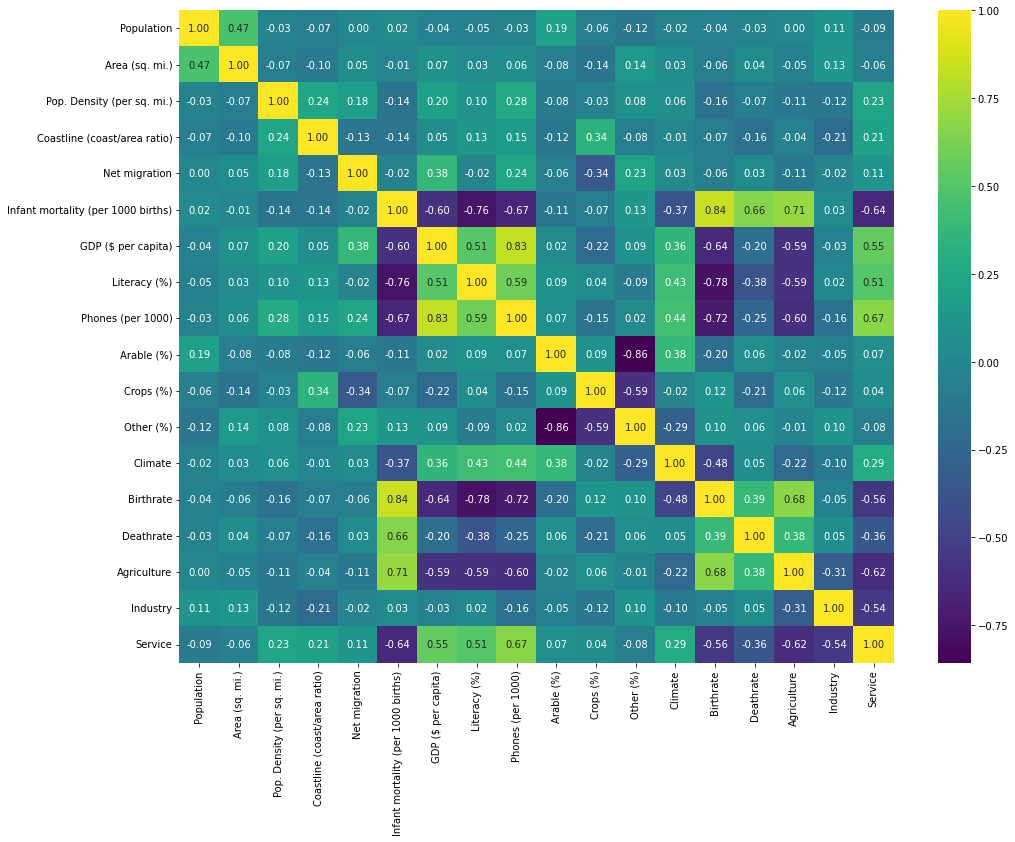

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

las asociasiones mas importantes son:
* evidentemente las variables entre ellas estan mas asociadas a si mismas por lo tanto en el valor de ellas es $1.0$
* el nacimiento de niños esta asosiada a la mortandad infantil en un $0.84$ ya que la cantidad de niños que nacen esta relacionado con la cantidad de niños que mueren.
* tasa de muertes esta asociada un $0.66$ con un mortandad infantil.
* la cantidad de telefonos esta asociada un $0.83$ con PIB.
* otros esta asociado con capacidad de cultivo un $-0.86$  

_________________________________________________________________________________________
#**7 Regresion lineal**
____________________________________________________________________________

A partir de la matriz de correlación antes vista, se seleccionaron 7 variables que mejor correlación tenian con el PBI percapita, con estas variables se realizará la regresión lineal.


_____________________________________________________________________________
##7.1 separación de los datos
____________________________________________________________________
Separamos el conjunto de datos en datos de entrenamiento y datos de prueba, los datos de prueba seran el 30% de los datos y los de entrenamiento el 70%

In [ ]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = [
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture', 'Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

____________________________________________________________________________
##7.2 Realizamos la regresión lineal
_____________________________________________________________________________

In [ ]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

###7.2.1 coeficientes de la regresión lineal: 

In [ ]:
model1.intercept_

5857.681111235348

In [ ]:
feature_names = train_X.columns
model_coefficients = model1.coef_
coefficients_df = pd.DataFrame(data = model_coefficients, index = feature_names, columns = ['coeficientes de las variables'])
print(coefficients_df)



                                    coeficientes de las variables
Net migration                                          436.753334
Infant mortality (per 1000 births)                      -5.463609
Literacy (%)                                             3.179673
Phones (per 1000)                                       27.719308
Birthrate                                              -47.116433
Agriculture                                         -10374.729869
Service                                               -183.805828


Con estos coeficientes podemos formar un hiperplano que corresponde a la funcion de la regresión 

___________________________________________________________________________
##7.3 Grafica del resultado comparado con los datos reales
__________________________________________________________________________

Text(0, 0.5, 'PBI predicción')

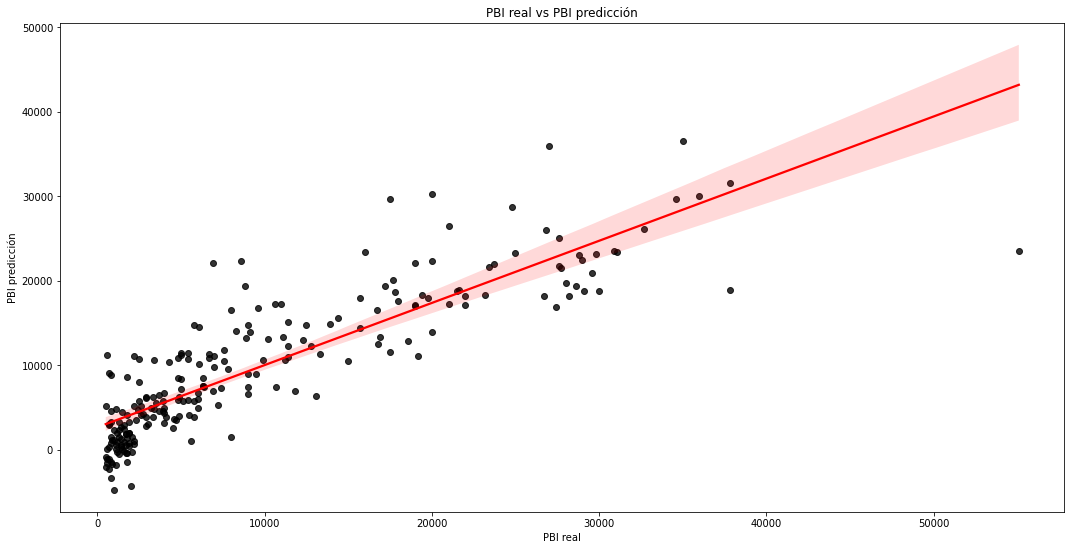

In [ ]:
plt.figure(figsize=(18,9))
whole=model1.predict(df[training_features])
sns.regplot(x=df[target],y=whole, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("PBI real vs PBI predicción")
plt.xlabel("PBI real")
plt.ylabel("PBI predicción")

________________________________________________________________________________________________
##7.4 Coeficiente de determinacion R^2
________________________________________________________________________

In [ ]:
print("El coeficiente de determinación para los datos de entrenamiento es: ", model1.score(train_X,train_Y))
print("El coeficiente de determinación para los datos de prueba es: ", r2_score(test_pred_Y,test_Y))


El coeficiente de determinación para los datos de entrenamiento es:  0.7574093027287039
El coeficiente de determinación para los datos de prueba es:  0.5473018396284651


##Cálculo del error

In [ ]:
Error_cuadratico_medio = mean_squared_error(df[target], whole)
Error_absoluto_medio = mean_absolute_error(df[target], whole)
Raiz_Error_cuadratico_medio = np.sqrt(Error_cuadratico_medio)

In [ ]:
print(f'Error cuadrático medio: {Error_cuadratico_medio:.2f}')
print(f'Error absoluto medio: {Error_absoluto_medio:.2f}')
print(f'Raiz error cuadrático medio : {Raiz_Error_cuadratico_medio:.2f}')

Error cuadrático medio: 25685412.11
Error absoluto medio: 3512.98
Raiz error cuadrático medio : 5068.08


_____________________________________________________________________________
#**8 Bibliografia**
_____________________________________________________________________________


* https://www.kaggle.com/code/atharvakale31/predict-gdp-of-custom-countries-and-visualization

* https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html